In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
def histograms_plot(dataframe, features, rows, cols, binNum, xsize=20, ysize=20):

    fig=plt.figure(figsize=(xsize,ysize))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=binNum,ax=ax,facecolor='skyblue')
        ax.set_title(feature,color='purple')
    
    fig.tight_layout()  
    plt.show()

# 1. Introducción

## 1.1. Programa *Atención a crisis*
[explicación del proyecto Atención a crisis] (infografía?)


<img src="Nicaragua Infografia 1 WIP.png"/>


## 1.2. Capstone Project

[Explicación de la motivación y los objectivos]

# 2. Exploración y Limpieza de Datos
## 2.1. Selección inicial de características

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns#Read main data to DataFrame
df = pd.read_stata('Cash_and_Childhood_Development_Replication/macoursetal_main.dta')  

In [4]:
#Read Variable Descriptions to DataFrame

Feat_df = pd.read_excel('VarNames_Labels.xlsm', header = 1)
pd.set_option('display.max_rows', None)

Feat_df[['Variable_Name', 'Variable_Label']]

Variable_Name  \
0                     hogarid08   
1                            cp   
2                   hogarid_old   
3                        cp_old   
4                 age_months_08   
5                     hogarid06   
6                           i06   
7            s4p7_parasite_i_08   
8            s4p39_daysbed_i_08   
9               cons_food_pc_08   
10               cons_tot_pc_08   
11                         cp06   
12                    unique_05   
13                s1age_head_05   
14                  s1hhsize_05   
15              s1hhsz_undr5_05   
16               s1hhsz_5_14_05   
17              s1hhsz_15_24_05   
18              s1hhsz_25_64_05   
19             s1hhsz_65plus_05   
20               s1male_head_05   
21             s2mother_inhs_05   
22             s3ap5_rooms_h_05   
23            s3ap23_stime_h_05   
24            s3ap24_htime_h_05   
25           s3ap25_hqtime_h_05   
26              s3atoilet_hh_05   
27        s3awater_access_hh_05   
28            s3aelectric_hh_05   
29           s4p6_vitamina_i_05   
30           s4p7_parasite_i_05   
31             s11ownland_hh_05   
32              cons_food_pc_05   
33               cons_tot_pc_05   
34                      tvip_05   
35                    height_05   
36                    a10whz_05   
37                    weight_05   
38                        itt_i   
39                    itt_all_i   
40                    yrsedfath   
41               a3leerdummy_08   
42                 age_transfer   
43                      bweight   
44                  noform_i_08   
45                 e1bp3_toy_08   
46                     cpmom_08   
47                age_months_06   
48                    s1male_06   
49           s4p7_parasite_i_06   
50               cons_tot_pc_06   
51                a5sscore_i_06   
52              a6smemory_p1_06   
53              a6smemory_p2_06   
54                 a7a_delay_06   
55               a7a_caution_06   
56                 a7b_delay_06   
57               a7b_caution_06   
58                 a7c_delay_06   
59               a7c_caution_06   
60                 a7d_delay_06   
61               a7d_caution_06   
62             a9sgrossmotor_06   
63                    height_06   
64                    weight_06   
65               a3leerdummy_06   
66                     cpmom_06   
67                            T   
68                         male   
69                       TREAT1   
70                       TREAT2   
71                       TREAT3   
72                       TREAT4   
73                       ed_mom   
74                         MUN1   
75                         MUN2   
76                         MUN3   
77                         MUN4   
78                         MUN5   
79                         MUN6   
80                   com_haz_05   
81                   com_waz_05   
82                  com_tvip_05   
83               com_control_05   
84                   com_vit_05   
85                com_deworm_05   
86                   com_notvip   
87                mominhouse_06   
88               guardianmom_06   
89                    titmom_06   
90                mominhouse_08   
91               guardianmom_08   
92                    titmom_08   
93                     sample08   
94                     sample06   
95                   a13cesd_08   
96                    e5home_08   
97                 a3stories_08   
98                nrhourread_08   
99                hourscuida_08   
100           hourstrabcuida_08   
101              hourstotalc_08   
102                 weighted_08   
103                  a3lapiz_08   
104                 propfood_08   
105                 prstap_f_08   
106           pranimalprot_f_08   
107             prfruitveg_f_08   
108                vitamiron_08   
109                    s4p39_06   
110                 propfood_06   
111                 prstap_f_06   
112           pranimalprot_f_06   
113             prfruitveg_f

Después de analizar las variables disponibles y estudiar la organización del estudio, se realiza una selección inicial de variables basada en el conocimiento previo sobre sus potenciales efectos sobre las variables resultado (es decir, se seleccionan las variables que se consideran más implicadas en el desarrollo cognitivo de los niños).

Una vez seleccionadas, se clasifican también según el tipo de variable para facilitar la posterior exploración, siguiendo:

1. BIN:  variable categórica binaria, indistintamente codificada como una *dummy variable* o en forma de texto
1. CAT: variable categórica, generalmente en forma de texto
1. CONT: variable numérica continua
1. FREQ: variable numérica continua que expresa frecuencia (valores entre 0 y 1)
1. ID: variable generalmente numérica que codifica un identificador, por lo que se considera categórica
1. ORD: variable numérica discreta

In [5]:
Feat_df.drop(Feat_df[Feat_df.Prior_Knowledge == "-"].index,  inplace=True)
Feat_df.drop(Feat_df[Feat_df.Prior_Knowledge == "X"].index,  inplace=True)

Feat_df.drop(columns=['VarIndex', 'Base_Model', 'NaN_Management'], inplace=True)

Feat_df[['Variable_Name', 'Variable_Label', 'Type']]

Variable_Name                                     Variable_Label  \
2              hogarid_old                               household ID in 2005   
3                   cp_old                                   Person code 2005   
12               unique_05                                        communityid   
13           s1age_head_05    age for the household head at time of interview   
14             s1hhsize_05                                     household size   
15         s1hhsz_undr5_05                         # people under 5 yrs in hh   
16          s1hhsz_5_14_05                    # people between 5 and 15 in hh   
17         s1hhsz_15_24_05                   # people between 15 and 25 in hh   
18         s1hhsz_25_64_05                   # people between 25 and 65 in hh   
19        s1hhsz_65plus_05                     # people 65 yrs and over in hh   
20          s1male_head_05                                  gender of hh head   
21        s2mother_inhs_05       mother of this person lives in the household   
22        s3ap5_rooms_h_05                                    number of rooms   
23       s3ap23_stime_h_05                          time to prim. school, hrs   
24       s3ap24_htime_h_05                         time to health center, hrs   
25      s3ap25_hqtime_h_05                          time to municipal hq, hrs   
26         s3atoilet_hh_05          household has a toilet for waste disposal   
27   s3awater_access_hh_05              Access to piped water within property   
28       s3aelectric_hh_05                              Access to electricity   
29      s4p6_vitamina_i_05                   vitamin A in last 6 mos,under 5y   
30      s4p7_parasite_i_05           anti-parasite in the last 6 mos,under 5y   
31        s11ownland_hh_05                                       hh owns land   
32         cons_food_pc_05                   annual pc total food consumption   
33          cons_tot_pc_05                           pc consumption aggregate   
34                 tvip_05                                     TVIP Raw score   
35               height_05                             Height-for-age z-score   
36               a10whz_05                          weight for height z-score   
37               weight_05                             Weight-for-age z-score   
38                   itt_i                                    Intent to treat   
39               itt_all_i                            Intent to treat - 4 cat   
40               yrsedfath                       Years of education of father   
42            age_transfer            Age in months at time of first transfer   
43                 bweight                                       Birth weight   
49      s4p7_parasite_i_06            Got deworming medicine in last 6 months   
51           a5sscore_i_06                            TVIP standardized score   
52         a6smemory_p1_06         standardize score McCarthy memory 1st part   
53         a6smemory_p2_06         standardize score McCarthy memory 2nd part   
54            a7a_delay_06            personal-social skills: delayed for age   
56            a7b_delay_06                   language skills: delayed for age   
58            a7c_delay_06                 fine motor skills: delayed for age   
60            a7d_delay_06                gross motor skills: delayed for age   
62        a9sgrossmotor_06             standardize score McCarthy gross motor   
63               height_06                height for age z-score (antrop age)   
64               weight_06                 weight for age z-score(antrop age)   
66                cpmom_06                            Person code mother 2006   
67                       T      =1 for treatment communities; = 0 for control   
68                    male                          =1 for boys, =0 for girls   
69                  TREAT1                                 itt_all_i==Control   
70                  TREAT2                  

In [6]:
dfI=df[["hogarid_old","cp_old","unique_05","s1age_head_05","s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05",
        "s1hhsz_15_24_05","s1hhsz_25_64_05","s1hhsz_65plus_05","s1male_head_05","s2mother_inhs_05","s3ap5_rooms_h_05",
        "s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","s3atoilet_hh_05","s3awater_access_hh_05",
        "s3aelectric_hh_05","s4p6_vitamina_i_05","s4p7_parasite_i_05","s11ownland_hh_05","cons_food_pc_05","cons_tot_pc_05",
        "tvip_05","height_05","a10whz_05","weight_05","itt_i","itt_all_i","yrsedfath","age_transfer","bweight",
        "s4p7_parasite_i_06","cpmom_06","T","male","TREAT1","TREAT2","TREAT3","TREAT4","ed_mom","MUN1","MUN2","MUN3","MUN4",
        "MUN5","MUN6","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","com_notvip",
        "sample06","vitamiron_06","weighted_05","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]

Las variables de resultado (*outcome*) engloban valores de tests cognitivos, psicomotores y de desarrollo físico. El objetivo del proyecto es predecir el valor de un subconjunto, a definir, de dichos *outcomes*:

In [7]:
Feat_df.loc[(Feat_df.Prior_Knowledge == "O"), ['Variable_Name', 'Variable_Label', 'Type']]

Variable_Name                              Variable_Label  Type
51      a5sscore_i_06                     TVIP standardized score  CONT
52    a6smemory_p1_06  standardize score McCarthy memory 1st part  CONT
53    a6smemory_p2_06  standardize score McCarthy memory 2nd part  CONT
54       a7a_delay_06     personal-social skills: delayed for age   BIN
56       a7b_delay_06            language skills: delayed for age   BIN
58       a7c_delay_06          fine motor skills: delayed for age   BIN
60       a7d_delay_06         gross motor skills: delayed for age   BIN
62   a9sgrossmotor_06      standardize score McCarthy gross motor  CONT
63          height_06         height for age z-score (antrop age)  CONT
64          weight_06          weight for age z-score(antrop age)  CONT
122         z_tvip_06                           z-score tvip 2006  CONT
124       z_social_06   z-score denver social-personal score 2006  CONT
126     z_language_06          z-score denver language score 2006  CONT
128     z_finmotor_06        z-score denver fine motor score 2006  CONT
130       z_memory_06       z-score memory for numbers score 2006  CONT
132      z_grmotor_06       z-score denver gross motor score 2006  CONT
134     z_legmotor_06                z-score leg motor score 2006  CONT
136     z_behavior_06       z-score behavioral problem index 2006  CONT
138       z_height_06                 z-score height-for-age 2006  CONT
140       z_weight_06                 z-score weight-for-age 2006  CONT
143          z_all_06            z-score of sum of all tests 2006  CONT

In [8]:
#df_out: dataframe de outcomes
df_out=df[["a5sscore_i_06","a6smemory_p1_06","a6smemory_p2_06","a7a_delay_06","a7b_delay_06",
        "a7c_delay_06","a7d_delay_06","a9sgrossmotor_06","height_06","weight_06","z_tvip_06","z_social_06",
        "z_language_06","z_finmotor_06","z_memory_06","z_grmotor_06","z_legmotor_06","z_behavior_06","z_height_06",
        "z_weight_06","z_all_06"]]


## 2.2. Exploración Inicial

### 2.2.1. Variables *outcome*

In [9]:
df_out

a5sscore_i_06  a6smemory_p1_06  a6smemory_p2_06  a7a_delay_06  \
0               NaN              NaN              NaN           NaN   
1              82.0        -0.294118        -0.166667           0.0   
2              61.0        -1.444444        -0.937500           1.0   
3              55.0        -3.111111        -0.937500           1.0   
4               NaN              NaN              NaN           1.0   
5               NaN              NaN              NaN           NaN   
6              75.0        -1.470588        -0.166667           0.0   
7               NaN              NaN              NaN           0.0   
8              55.0        -3.000000        -1.555556           1.0   
9              62.0         0.222222        -0.312500           0.0   
10             85.0        -0.421053        -0.250000           0.0   
11              NaN              NaN              NaN           0.0   
12             82.0        -2.647059              NaN           1.0   
13              NaN              NaN              NaN           0.0   
14             66.0        -1.157895        -0.400000           0.0   
15             86.0        -1.684211        -0.400000           1.0   
16             63.0        -3.105263              NaN           1.0   
17              NaN              NaN              NaN           1.0   
18             57.0        -3.111111              NaN           1.0   
19              NaN              NaN              NaN           1.0   
20             55.0        -0.888889        -0.937500           0.0   
21             82.0        -2.000000        -0.250000           1.0   
22             60.0        -1.684211        -0.400000           0.0   
23            116.0        -0.647059         0.666667           1.0   
24             69.0        -0.631579        -0.400000           0.0   
25             77.0        -1.470588        -0.166667           0.0   
26              NaN              NaN              NaN           0.0   
27              NaN              NaN              NaN           0.0   
28              NaN              NaN              NaN           1.0   
29             66.0              NaN              NaN           1.0   
30              NaN              NaN              NaN           1.0   
31              NaN              NaN              NaN           0.0   
32             72.0        -1.823529        -1.555556           1.0   
33              NaN              NaN              NaN           NaN   
34             55.0        -4.176471              NaN           0.0   
35              NaN              NaN              NaN           NaN   
36            101.0        -1.470588        -0.166667           0.0   
37             72.0         0.882353        -0.166667           1.0   
38              NaN              NaN              NaN           0.0   
39              NaN              NaN              NaN           0.0   
40             88.0        -0.947368        -0.250000           1.0   
41             89.0        -0.947368              NaN           0.0   
42             56.0        -2.052632              NaN           0.0   
43             55.0        -0.888889        -0.937500           0.0   
44              NaN              NaN              NaN           1.0   
45             55.0        -0.888889        -0.937500           1.0   
46              NaN              NaN              NaN           0.0   
47              NaN              NaN              NaN           0.0   
48             55.0        -2.000000        -0.937500           0.0   
49              NaN              NaN              NaN           1.0   
50             60.0        -2.000000        -0.937500           1.0   
51              NaN              NaN              NaN           0.0   
52             55.0        -0.888889        -0.937500           0.0   
53              NaN              NaN              NaN           0.0   
54              NaN              NaN              NaN           NaN   
55             72.0        -1.

### Datos faltantes
Se investiga el número de datos faltantes (NaN) por variable para evaluar su gestión e impacto sobre la selección del subconjunto de *outcomes* a modelar. 

In [10]:
print(len(df_out[df_out.isnull().all(axis=1)].index),"individuos tienen NaN en todas las variables")

1181 individuos tienen NaN en todas las variables


In [11]:
df_out.isnull().sum().sort_values() #Número de NaN por variable

z_all_06            1185
a7a_delay_06        1200
z_social_06         1204
a7b_delay_06        1220
z_language_06       1224
a7c_delay_06        1242
z_finmotor_06       1246
a7d_delay_06        1254
z_grmotor_06        1258
z_height_06         1429
height_06           1429
weight_06           1429
z_weight_06         1429
a9sgrossmotor_06    2656
a6smemory_p1_06     2669
z_legmotor_06       2673
a5sscore_i_06       2679
z_memory_06         2684
z_tvip_06           2694
z_behavior_06       2891
a6smemory_p2_06     3141
dtype: int64

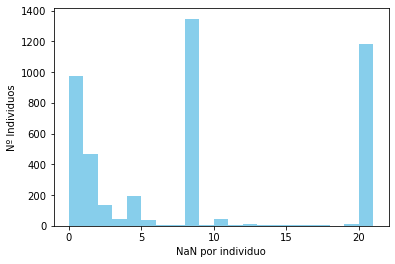

In [12]:
plt.hist(df_out.isnull().sum(axis=1), bins=21,facecolor='skyblue')
plt.ylabel('Nº Individuos')
plt.xlabel('NaN por individuo');

Según el histograma, vemos que a la mayoría les faltan 8 o 21 o 1 *outcomes*. Se estudia de qué *outcomes* se trata (celdas a continuación). 
- De los que les faltan 21, no se dispone de datos para ningún *outcome*.
- A los que les faltan 8, les faltan datos para las variables "*a5sscore_y_06*","*a6smemory_p1_06*", "*a9sgrossmotor_06*", "*z_tvip_06*", "*z_memory_06*", "*z_legmotor_06*", "*z_*behavior_06*". Es decir, no se les ha podido realizar los tests de memoria y psicomotricidad de McCarthy, el TVIP ni el test de Desarrollo Sociopersonal de Denver.
- A los que les falta una sola variable, les falta o bien la 2ª parte del test de memoria de McCarthy, o bien el test de Denver.


In [13]:
NaN_df = pd.DataFrame()

for i in [1, 8, 21]:

    new_column = "#NaN = {}".format(i) 
    NaNdata = df_out[df_out.isnull().sum(axis=1)==i].isnull().sum()
    NaN_df = NaN_df.assign(**{new_column: NaNdata})

NaN_df
                  

#NaN = 1  #NaN = 8  #NaN = 21
a5sscore_i_06            0      1343       1181
a6smemory_p1_06          0      1346       1181
a6smemory_p2_06        323      1347       1181
a7a_delay_06             0         0       1181
a7b_delay_06             0         0       1181
a7c_delay_06             0         0       1181
a7d_delay_06             0         3       1181
a9sgrossmotor_06         0      1346       1181
height_06                0         1       1181
weight_06                0         2       1181
z_tvip_06                0      1343       1181
z_social_06              0         0       1181
z_language_06            0         0       1181
z_finmotor_06            0         0       1181
z_memory_06              0      1346       1181
z_grmotor_06             0         3       1181
z_legmotor_06            0      1346       1181
z_behavior_06          147      1347       1181
z_height_06              0         1       1181
z_weight_06              0         2       1181
z_all_06                 0         0       1181


La falta de valores para estos *outcomes* está estrechamente relacionada con la edad del sujeto (histogramas de edad según #NaN = [0, 1, 8, 21])

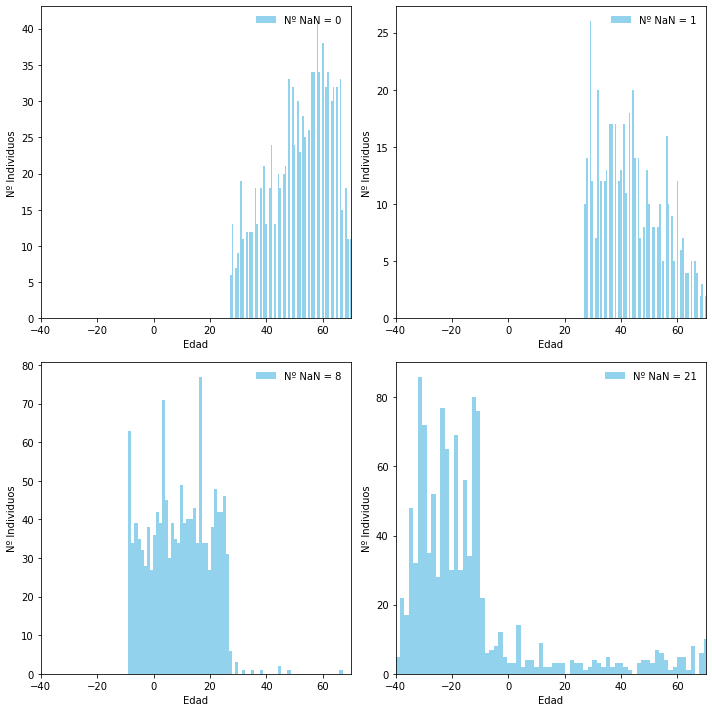

In [14]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    NaN_counts = [21,0,8,1]
    
    for i in range(2):
        for j in range(2):

            ax = axes[i][j]

            n=NaN_counts[2*(j-1)+(i-1)]
            
            ax.hist(dfI[df_out.isnull().sum(axis=1)==n].age_transfer, bins=70, color='skyblue', alpha=0.9, label='Nº NaN = {}'.format(n))
            ax.set_xlabel('Edad')
            ax.set_ylabel('Nº Individuos')
            ax.set_xlim([-40, 70])
            
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)
            
    fig.tight_layout()  
    plt.show()

Teniendo en cuenta que *age_transfer* <0 significa que el individuo nació posteriormente al inicio el tratamiento, a esos individuos no se les pudo realizar ciertos tests por no alcanzar sus respectivos límites de edad. Por este motivo, se decide omitir los datos para los que nacieron más de once meses después del inicio del tratamiento (*age_transfer* < -11).

### Relación entre *outcomes* y tratamiento
Se explora la relación entre la variable de tratamiento *T*, para comprobar si existen relaciones evidentes *a priori*. 

In [15]:
df_violin=pd.concat([dfI, df_out])
df_violin["dummyVar"]=0

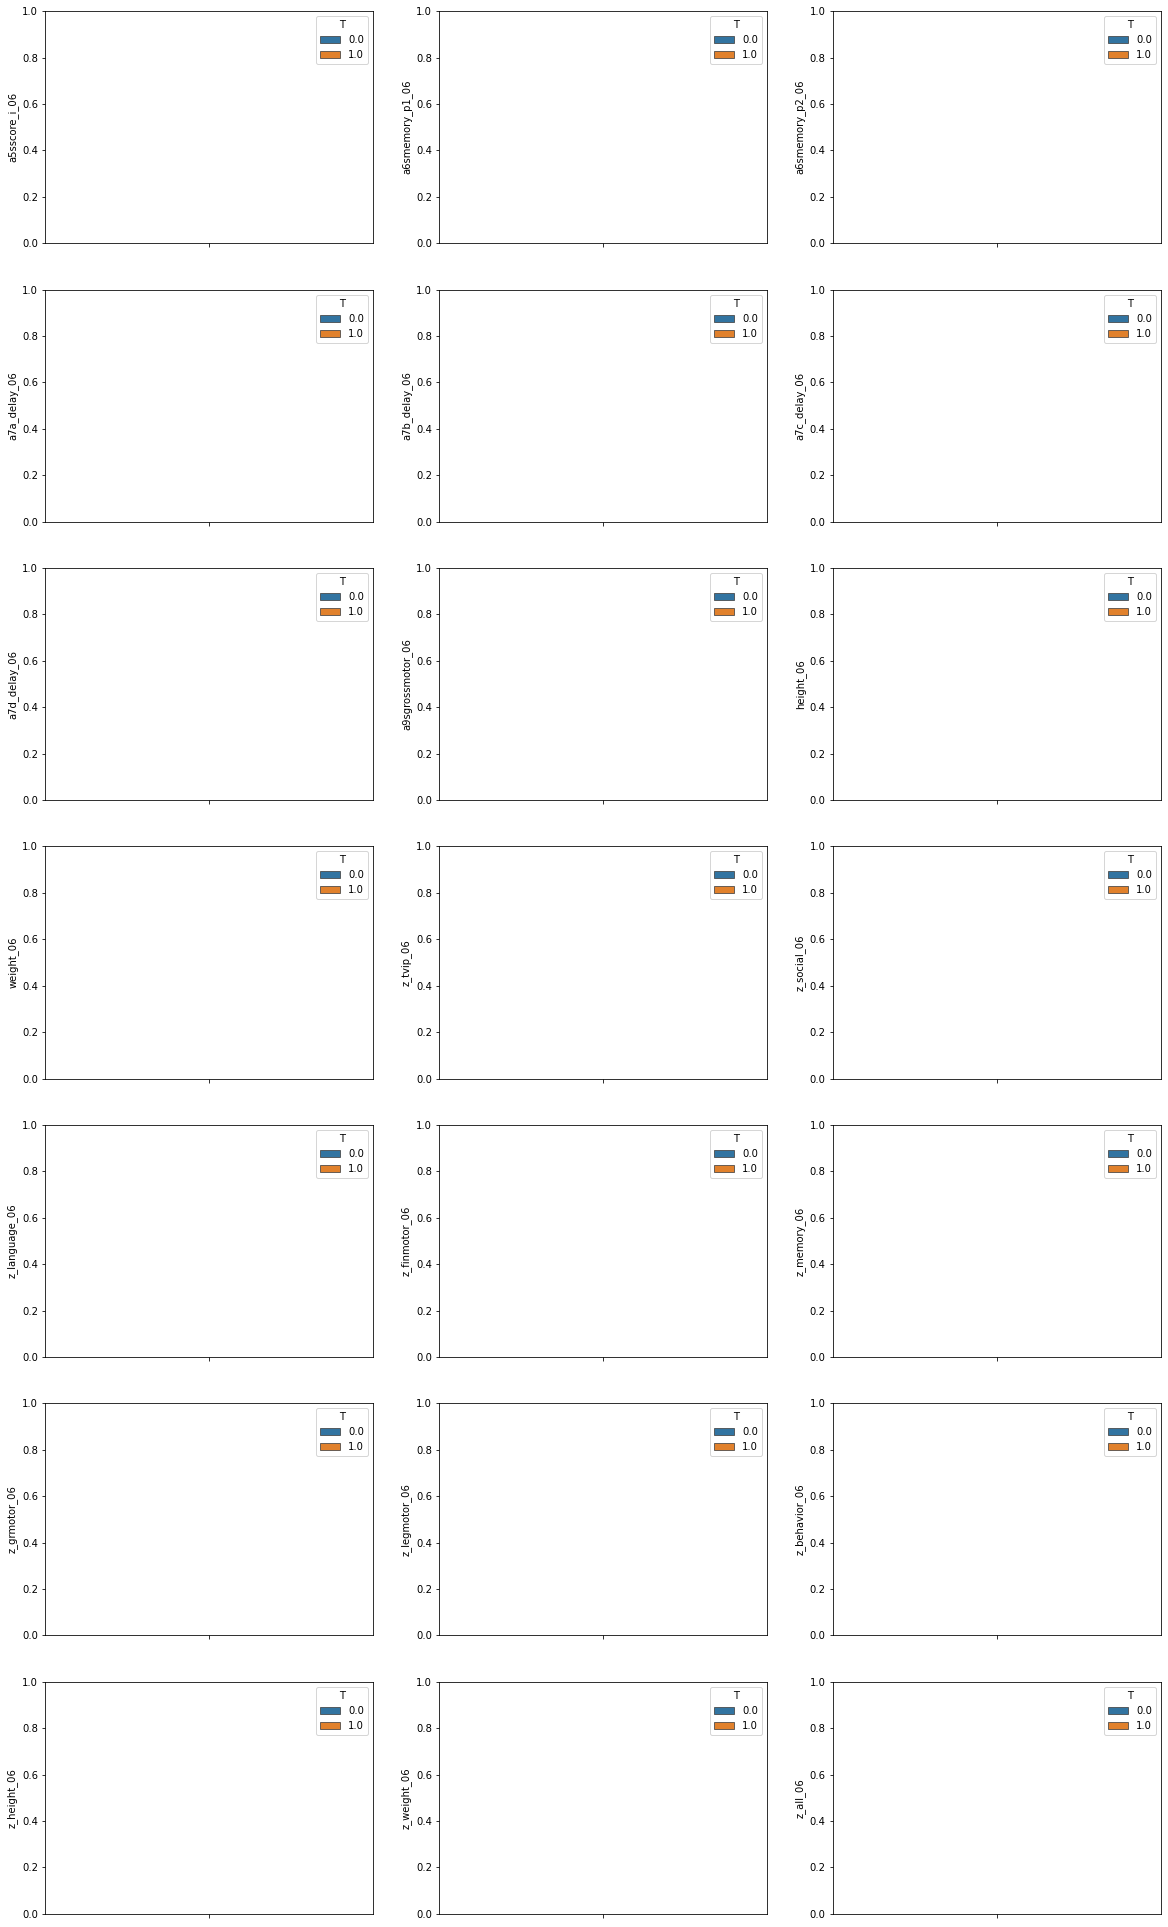

In [16]:

col=df_out.columns

fig=plt.figure(figsize=(20,35))
for i in range(21):
    ax=fig.add_subplot(7,3,i+1)
    sns.violinplot(ax=ax, x="dummyVar",y=col[i], hue="T", data=df_violin, split=True, width=0.5)
    ax.set(xlabel=None)
    ax.set(xticklabels=[])
    

Según los gráficos anteriores, no hay ningún *outcome* que se vea afectado muy evidentemente por el tratamiento.

### 2.2.2. Variables independientes

A continuación se estudian las variables *input* para la predicción del subconjunto de *outcomes*.

 <ins> **Correlaciones**</ins>
 
En primer lugar, se analizan posibles correlaciones entre las variables. Se calculan los coeficientes de correlación de Pearson, Kendall y Spearman para todas las parejas de variables, sin incluir variables de identificación. En la siguiente tabla se muestran las parejas con un coeficiente de correlación de Pearson superior a 0.5, coloreados en gradiente de 0.5 a 1. 

In [17]:
ID_vars= ["hogarid_old","cp_old","unique_05","cpmom_06"]

#Dataframe para Pearson

corr_matrix = dfI.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

High_corr = sol[sol>=0.5]
High_corr_df = pd.DataFrame(High_corr).reset_index()
High_corr_df.columns= ["Var1","Var2","Pearson"]

High_corr_df.drop(High_corr_df[High_corr_df["Var1"].isin(ID_vars)].index, inplace=True)
High_corr_df.drop(High_corr_df[High_corr_df["Var2"].isin(ID_vars)].index, inplace=True)

#Dataframe para Kendall

corr_kendall = dfI.corr(method='kendall').abs()

sol_kd = (corr_kendall.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

High_corr_kd = sol_kd[sol_kd>=0.5]
High_corr_kd_df = pd.DataFrame(High_corr_kd).reset_index()
High_corr_kd_df.columns= ["Var1","Var2","Kendall"]

High_corr_kd_df.drop(High_corr_kd_df[High_corr_kd_df["Var1"].isin(ID_vars)].index, inplace=True)
High_corr_kd_df.drop(High_corr_kd_df[High_corr_kd_df["Var2"].isin(ID_vars)].index, inplace=True)

#Dataframe para Spearman

corr_spearman = dfI.corr(method='spearman').abs()

sol_sp = (corr_spearman.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

High_corr_sp = sol_sp[sol_sp>=0.5]
High_corr_sp_df = pd.DataFrame(High_corr_sp).reset_index()
High_corr_sp_df.columns= ["Var1","Var2","Spearman"]

High_corr_sp_df.drop(High_corr_sp_df[High_corr_sp_df["Var1"].isin(ID_vars)].index, inplace=True)
High_corr_sp_df.drop(High_corr_sp_df[High_corr_sp_df["Var2"].isin(ID_vars)].index, inplace=True)

#Fusionar dataframes

merged = High_corr_df.merge(High_corr_sp_df, on=['Var1', 'Var2'])
merged = merged.merge(High_corr_kd_df, on=['Var1', 'Var2'])

merged.style.background_gradient(cmap='coolwarm', vmin=0.5, vmax=1)

<ipython-input-17-db554d0e57f8>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-17-db554d0e57f8>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol_kd = (corr_kendall.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-17

De estas correlaciones:

   - *TREAT1 - T*: por diseño, quién es tratado, como mínimo, es tratado con la aportación económica básica (TREAT1).
    
   - *cons_tot_pc_05 - cons_food_pc_05*: el gasto absoluto *per capita* y el gasto en comida tienen una correlación directa.
      
   - *com_waz_05 - com_haz_05*: los valores medios por comunidad para la estatura según la edad y el peso según la edad se correlacionan de forma evidente por el crecimiento natural de los niños.
    
   - *weight_05 - height_05*: de la misma manera, los valores absolutos de peso y estatura también se correlaciones.
   
   - *com_vit_05 - com_deworm_05*: esta correlación podría darse porque en una comunidad en la que se han administrado vitaminas a los niños es probable que también tengan acceso a fármacos antihelmínticos.

 <ins> **Gestión de datos faltantes**</ins>

Analizando la distribución de datos faltantes por individuo en las variables de entrada:

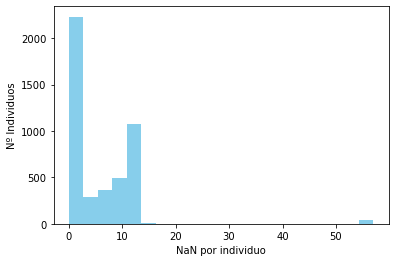

In [18]:
plt.hist(dfI.isnull().sum(axis=1), bins=21,facecolor='skyblue')
plt.ylabel('Nº Individuos')
plt.xlabel('NaN por individuo');

Observamos que hay 46 personas a las que les faltan la mayoría de características. Se decide eliminar dichos registros por falta de datos.

Para el resto de registros, se analizará la distribución de datos faltantes para proponer estrategias de imputación y/u omisión.

In [107]:
nan_rows=dfI[dfI.isnull().sum(axis=1)>=50].index
dfI.drop(nan_rows, inplace=True)

NaN_df= pd.DataFrame({'Variable_Name':dfI.isna().sum().index, '#NaN':dfI.isna().sum().values})

merge= Feat_df.merge(NaN_df, on=['Variable_Name'])
merge=merge[merge["Variable_Name"].isin(Feat_w_NaN)].sort_values('#NaN')
merge.drop(columns=['Type', 'Prior_Knowledge'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Variable_Name                                     Variable_Label  \
61     prfruitveg_f_05  % fruit and vegetables in total food expenditures   
59         prstap_f_05               % staples in total food expenditures   
60   pranimalprot_f_05       % animal proteins in total food expenditures   
11    s2mother_inhs_05       mother of this person lives in the household   
58         propfood_05                       % food in total expenditures   
22     cons_food_pc_05                   annual pc total food consumption   
41              ed_mom    Number of years of education mother at baseline   
30           yrsedfath                       Years of education of father   
56        vitamiron_06               Got vitamin or iron in last 6 months   
33  s4p7_parasite_i_06            Got deworming medicine in last 6 months   
34            cpmom_06                            Person code mother 2006   
32             bweight                                       Birth weight   
1               cp_old                                   Person code 2005   
57         weighted_05                           Weighed in last 6 months   
20  s4p7_parasite_i_05           anti-parasite in the last 6 mos,under 5y   
19  s4p6_vitamina_i_05                   vitamin A in last 6 mos,under 5y   
27           weight_05                             Weight-for-age z-score   
25           height_05                             Height-for-age z-score   
26           a10whz_05                          weight for height z-score   
24             tvip_05                                     TVIP Raw score   

    #NaN  
61    18  
59    18  
60    18  
11   127  
58   127  
22   127  
41   257  
30   456  
56  1148  
33  1149  
34  1187  
32  1598  
1   1638  
57  1866  
20  1920  
19  1920  
27  1998  
25  2007  
26  2046  
24  3362

La presencia de tantos datos faltantes puede ser debida, como se ha observado en los *outcomes*, a la edad de los sujetos. Al realizar la omisión de los registros para los que *age_transfer*<-11, se resuelve una cantidad considerable de conflictos:

In [108]:
AgeDrop_rows=dfI[dfI.age_transfer<-11].index

dfIDrop=dfI.drop(AgeDrop_rows)

Feat_w_NaN = dfIDrop.isna().sum()[dfIDrop.isna().sum()>0].sort_values().axes
Feat_w_NaN= Feat_w_NaN[0].tolist()

NaN_df= pd.DataFrame({'Variable_Name':dfIDrop.isna().sum().index, '#NaN AgeDrop':dfIDrop.isna().sum().values})

merge= merge.merge(NaN_df, on=['Variable_Name'])
merge= merge[merge["Variable_Name"].isin(Feat_w_NaN)].sort_values('#NaN AgeDrop')
merge.drop(columns=['Type', 'Prior_Knowledge'])

Variable_Name                                     Variable_Label  \
0      prfruitveg_f_05  % fruit and vegetables in total food expenditures   
1          prstap_f_05               % staples in total food expenditures   
2    pranimalprot_f_05       % animal proteins in total food expenditures   
3     s2mother_inhs_05       mother of this person lives in the household   
4          propfood_05                       % food in total expenditures   
5      cons_food_pc_05                   annual pc total food consumption   
6               ed_mom    Number of years of education mother at baseline   
8         vitamiron_06               Got vitamin or iron in last 6 months   
9   s4p7_parasite_i_06            Got deworming medicine in last 6 months   
10            cpmom_06                            Person code mother 2006   
7            yrsedfath                       Years of education of father   
11             bweight                                       Birth weight   
12              cp_old                                   Person code 2005   
13         weighted_05                           Weighed in last 6 months   
14  s4p7_parasite_i_05           anti-parasite in the last 6 mos,under 5y   
15  s4p6_vitamina_i_05                   vitamin A in last 6 mos,under 5y   
16           weight_05                             Weight-for-age z-score   
17           height_05                             Height-for-age z-score   
18           a10whz_05                          weight for height z-score   
19             tvip_05                                     TVIP Raw score   

    #NaN  #NaN AgeDrop  
0     18            13  
1     18            13  
2     18            13  
3    127           127  
4    127           127  
5    127           127  
6    257           257  
8   1148           310  
9   1149           311  
10  1187           349  
7    456           394  
11  1598           757  
12  1638           798  
13  1866          1026  
14  1920          1080  
15  1920          1080  
16  1998          1158  
17  2007          1167  
18  2046          1206  
19  3362          2521

Analizando el sentido de estas variables, se propone la siguiente estrategia de imputación:

- Ciertas variables corresponden a información que potencialmente pertenece a toda la unidad familiar (como los años de educación de la madre), por lo que se hipotetiza que en otros registros que pertenezcan a la misma unidad familiar (según el identificador *hogarid_old*) aparecerá la información faltante. De esta manera, se podrán imputar según la media o la moda (para variables cuantitativas y categóricas, respectivamente) dentro de la misma unidad familiar.

<span style="color:blue"> 
Així doncs les variables amb NaN són:
- prstap_f_05: % staples in total food expenditures
- pranimalprot_f_05: % animal proteins in total food expenditures
- prfruitveg_f_05: % fruit and vegetables in total food expenditures  
- propfood_05: % food in total expenditures
        (Sembla que per falta de dades, en tot cas són 18 persones només. Caldria mirar perque hi mes Nans a propfood que a protprotein pe)
- ed_mom (Number of years of education mother at baseline)
        (257 NaNs, valdria la pena imputar-los(mitjana o mediana) a no ser que la variable sigui molt explicativa)
- vitamiron_06: Got vitamin or iron in last 6 months
        (Sembla que en aquest cas els Nulls es deuen a individus que van neixer després de fer el test age_transfer<0, vegi's histograma_n. (Caldria assignarlos-hi algun valor? Possiblement en un futur prenguin vitamines, tot i que això no tingui efecte en els nostres tests de desenvolupaments... segurament millor no imputar-los-hi valor. Imputem per families.))
- s4p7_parasite_i_06 (Got deworming medicine in last 6 months)
        (Exactament igual que en vitamiron_06, de fet ih ha practicament el mateix nombre de NaNs)
- cpmom_06: personal code mom 06
        (Els NaNs es troben majoritàriament 9 mesos abans de l'age_tranfer. Així només van anotar el cp per a aquelles mares que sabien que serien mares en el moment de la transferència. Vegi's histograma n+2)
- bweight:  (Birth weight)  
        (Veiem que passa igual que en la resta, la majoria de NaNs es troben per age_transfer<0, en aquest cas<5. No es devien anotar els pesos al neixament de nens nascuts després de donar l'ajuda. En aquest cas clarament podriem imputar la mitjana per als amb age_transfer>5, i veure com actuar amb la resta. Vegi's histograma n+1)
- weighted_05: Weighed in last 6 months
        (Passarà el mateix que amb els vitamin iron. Podriem imputar valors fent una regressió pes/temps potser?)
          </span>

<ins>    -  **Imputación por unidad familiar**</ins>


Para comprobar que la imputación de datos faltantes según la unidad familiar es una estrategia adecuada, se crea un *dataframe* que consolida los datos para las variables en estudio por NaN según el código de la unidad familiar (*hogarid_old*).

De estos datos se busca que dentro de una misma unidad familiar se cuente con el mismo valor para cada variable. A modo ilustrativo, si en una unidad familiar de tres hijos se cuenta con los siguientes datos para el porcentaje de gastos en alimentos [ 56%, 56%, NaN ] (*propfood_05*), se puede deducir que el valor faltante también corresponderá a 56%.

In [19]:
def byhousehold_df(dfI, hh_feat_to_impute):
    household_df= pd.DataFrame({"Household_ID": dfI.hogarid_old.unique()})
    
    for feat in hh_feat_to_impute:
        household_df[feat]=[dfI[dfI.hogarid_old==familia][feat].values for familia in dfI.hogarid_old.unique()]
    
    return household_df.copy()


In [20]:
feats_hh_impute = ["prfruitveg_f_05",
                   "prstap_f_05",
                   "pranimalprot_f_05",
                   "s2mother_inhs_05",
                   "propfood_05",
                   "cons_food_pc_05",
                   "ed_mom",
                   "yrsedfath",
                   "vitamiron_06",
                  ]
hh_df = byhousehold_df(dfI, feats_hh_impute)
hh_df

Household_ID                                    prfruitveg_f_05  \
0         70053101                                       [0.06265184]   
1         70053301                                              [0.0]   
2         70053401            [0.009460336, 0.009460336, 0.009460336]   
3         70053701               [0.13510896, 0.13510896, 0.13510896]   
4         70053901                                       [0.06760751]   
5         70054001                                              [0.0]   
6         70054101            [0.052390017, 0.052390017, 0.052390017]   
7         70054501                                              [0.0]   
8         70054601                                       [0.03502627]   
9         70054701                       [0.0037958976, 0.0037958976]   
10        70054901                         [0.023115268, 0.023115268]   
11        70055201                                              [0.0]   
12        70055301               [0.12319842, 0.12319842, 0.12319842]   
13        70055501                     [0.140739, 0.140739, 0.140739]   
14        70055701               [0.27251598, 0.27251598, 0.27251598]   
15        70056001                           [0.06427291, 0.06427291]   
16        70056401                                      [0.040375177]   
17        70056701                                       [0.05141265]   
18        70056801                                       [0.17158335]   
19        70056901                                       [0.20968826]   
20        70057101                                       [0.03739662]   
21        70057201                                         [0.0, 0.0]   
22        70057502                         [0.009799533, 0.009799533]   
23        70057601                                      [0.034506768]   
24        70057901                                         [0.0, 0.0]   
25        70058001                                        [0.2612274]   
26        70058601                           [0.07184305, 0.07184305]   
27        70058701                           [0.08788784, 0.08788784]   
28        70058801                                         [0.0, 0.0]   
29        70058901               [0.01045962, 0.01045962, 0.01045962]   
30        70059001               [0.07281165, 0.07281165, 0.07281165]   
31        70059301                           [0.07104374, 0.07104374]   
32        70059401                           [0.04868549, 0.04868549]   
33        70059601                                        [0.0775911]   
34        70059701                                       [0.40393245]   
35        70059802                           [0.45551276, 0.45551276]   
36        70059901                                       [0.10412495]   
37        70060001                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
38        70060202                         [0.033015873, 0.033015873]   
39        70060401                                      [0.088533625]   
40        70060501                                         [0.0, 0.0]   
41        70060601                           [0.13432643, 0.13432643]   
42        70060701                           [0.06879042, 0.06879042]   
43        70061001                         [0.016392343, 0.016392343]   
44        70061101                           [0.09959778, 0.09959778]   
45        70061201            [0.060324825, 0.060324825, 0.060324825]   
46        70061301                         [0.028991684, 0.028991684]   
47        70061401                         [0.045147598, 0.045147598]   
48        70061701                                       [0.27026638]   
49        70061901                                    [0.0, 0.0, 0.0]   
50        70062001               [0.70465654, 0.70465654, 0.70465654]   
51        70062101               [0.47023878, 0.47023878, 0.47023878]   
52        70062201                         [0.031306442, 0.031306442]   
53        70062301                                      [0.04688

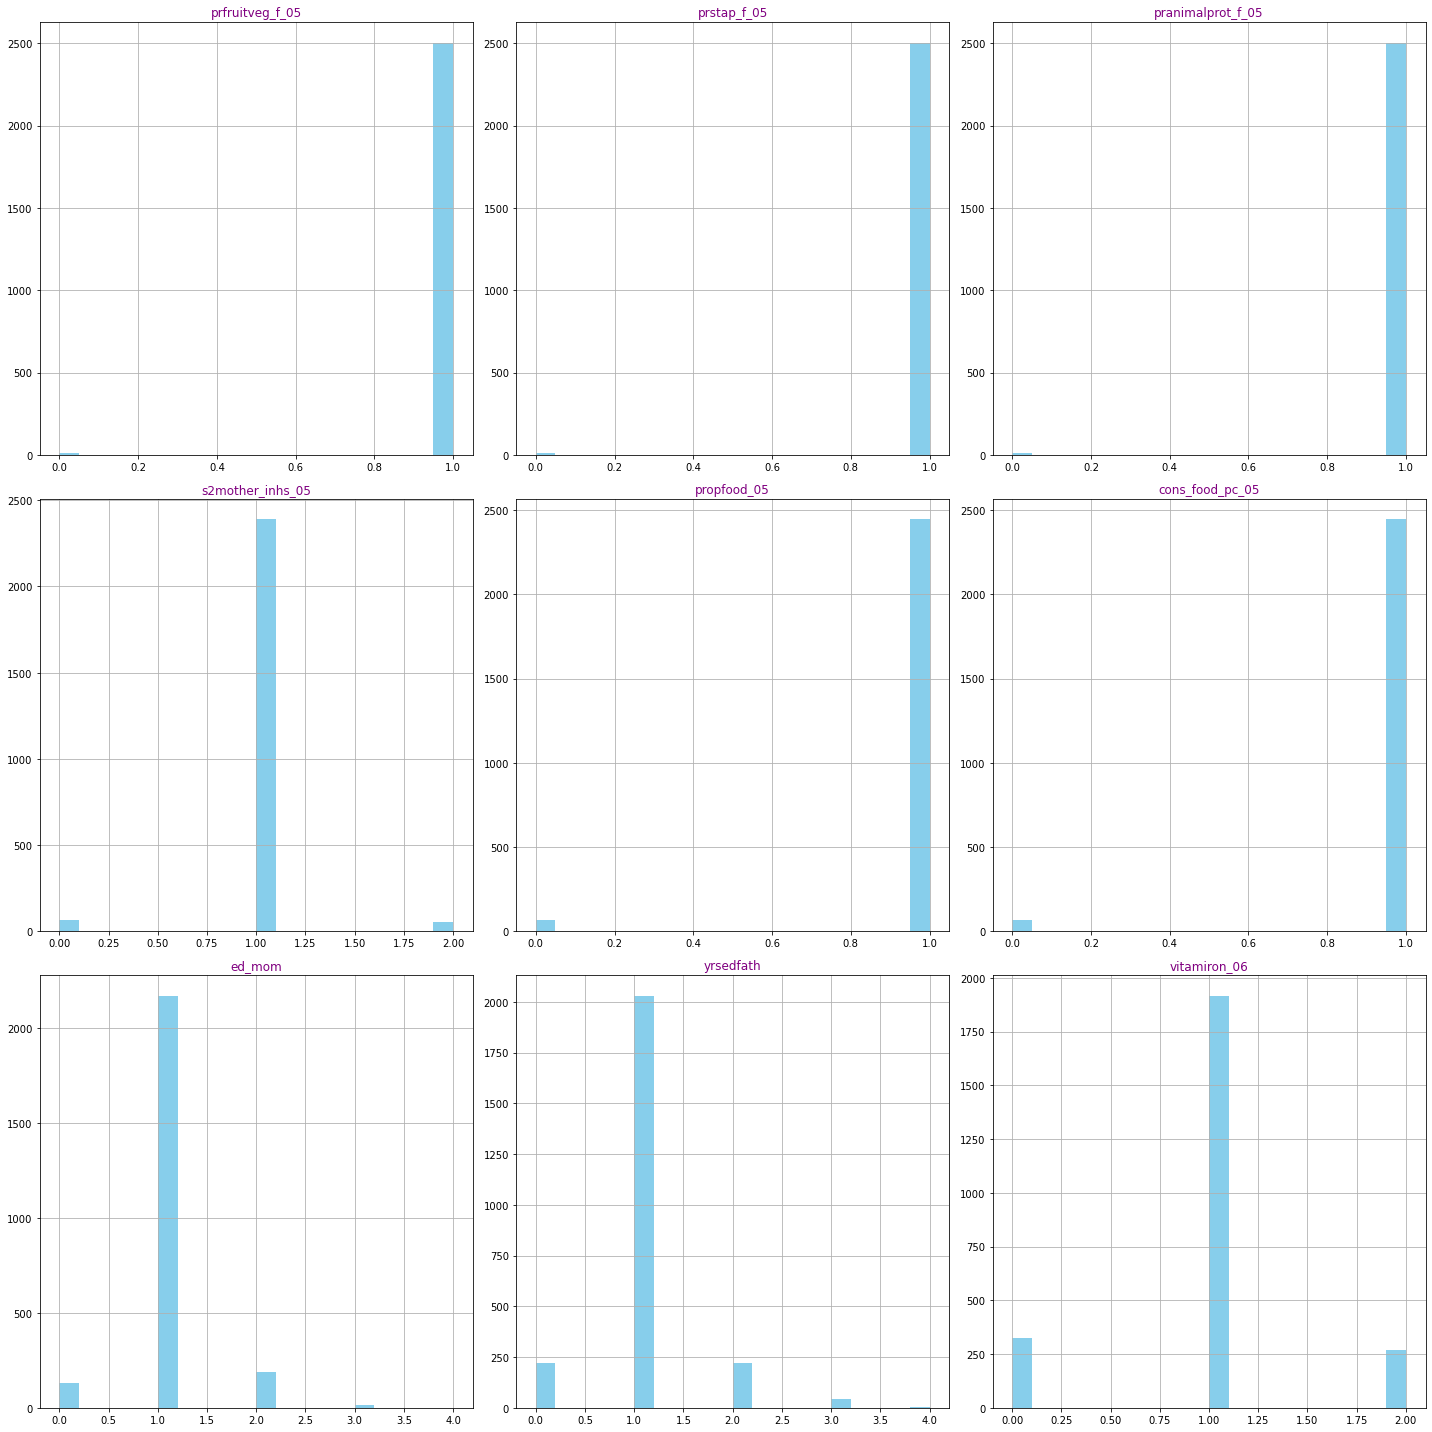

In [27]:
hh_df_unique = pd.DataFrame(hh_df["Household_ID"])

for feat in feats_hh_impute:
    hh_df_unique[feat]=[len(np.unique(hh_df[feat][i][~np.isnan(hh_df[feat][i])])) for i in range(len(hh_df[feat]))]

histograms_plot(hh_df_unique,hh_df_unique.columns[hh_df_unique.columns!='Household_ID'],3,3,20)

Los histogramas muestran que, para la gran mayoría de variables y unidades familiares, la imputación es correcta. Así pues, se decide implementar esta estrategia para resolver los datos faltantes para estas variables.

## Outliers 

Analitzem ara els outliers. Aplicarem els tests 3-sigma i IQR

In [418]:
df.cpmom_06.values

array([ 2.,  2.,  7., ..., nan, nan, nan])

In [452]:
def iqr(series):
    mild_outlier_indexes=[]
    extreme_outlier_indexes=[]
    q25 = np.nanpercentile(series.values, 25)
    q75 = np.nanpercentile(series.values, 75)
    iqrange = q75 - q25         #inter-quartile range
    for i in series.index:
        if(np.isnan(series[i])==False):
            if ((series[i]<(q25 - 1.5*iqrange)) or  ((q75 + 1.5*iqrange) < series[i])):
                mild_outlier_indexes.append(i)
            if ((series[i]<(q25 - 2*iqrange)) or  ((q75 + 2*iqrange) < series[i])):
                extreme_outlier_indexes.append(i)
    return mild_outlier_indexes,extreme_outlier_indexes

In [482]:
def sigma3(series):
    outlier_indexes=[]
    mean = np.nanmean(series.values)
    std= np.nanstd(series.values)
    for i in series.index:
        if(np.isnan(series[i])==False):
            if ((abs(series[i]-mean)>2.58*std)):
                outlier_indexes.append(i)
    return outlier_indexes

In [483]:
outlier_cols=["bweight","ed_mom","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05",
              "com_deworm_05","com_notvip","sample06","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]

In [484]:
mild_outliers_n=[]
extreme_outliers_n=[]
    
for col in outlier_cols:
    mild, extreme=iqr(df05[col])
    mild_outliers_n.append(len(mild))
    extreme_outliers_n.append(len(extreme))
extreme_outliers_series=pd.Series(extreme_outliers_n, index=outlier_cols)
mild_outliers_series=pd.Series(mild_outliers_n, index=outlier_cols)

In [485]:
extreme_outliers_series

bweight               59
ed_mom                14
com_haz_05             0
com_waz_05             4
com_tvip_05          150
com_control_05        47
com_vit_05             0
com_deworm_05          4
com_notvip            80
sample06               0
propfood_05           24
prstap_f_05            0
pranimalprot_f_05     77
prfruitveg_f_05      128
dtype: int64

In [486]:
mild_outliers_series

bweight              126
ed_mom                26
com_haz_05            22
com_waz_05            45
com_tvip_05          188
com_control_05       239
com_vit_05             4
com_deworm_05         36
com_notvip           177
sample06               0
propfood_05           77
prstap_f_05           32
pranimalprot_f_05    172
prfruitveg_f_05      216
dtype: int64

In [487]:
sigma_outliers_n=[]
    
for col in outlier_cols:
    sigma_indexes=sigma3(df05[col])
    sigma_outliers_n.append(len(sigma_indexes))
sigma_outliers_series=pd.Series(sigma_outliers_n, index=outlier_cols)


In [488]:
sigma_outliers_series

bweight               54
ed_mom                41
com_haz_05            26
com_waz_05            45
com_tvip_05          188
com_control_05        47
com_vit_05             4
com_deworm_05         36
com_notvip            80
sample06               0
propfood_05           76
prstap_f_05           42
pranimalprot_f_05    111
prfruitveg_f_05      107
dtype: int64

Imprimim els outliers per la variable bweight.

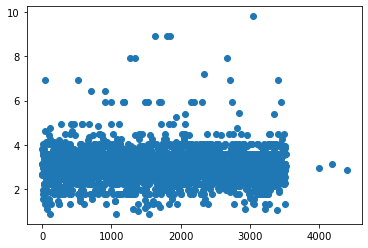

In [478]:
plt.scatter( [i for i in range(len(df05.bweight.values))],df05.bweight.values*0.45)

In [479]:
mild, extreme=iqr(df05.bweight)

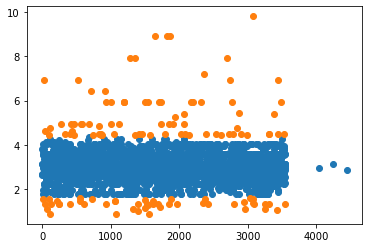

In [480]:
no_outliers=df05.bweight.drop(mild)
plt.scatter( no_outliers.index,no_outliers.values*0.45)
plt.scatter( df05.bweight[mild].index,df05.bweight[mild].values*0.45)

ValueError: x and y must be the same size

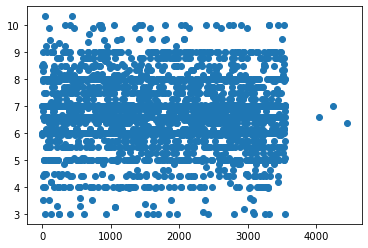

In [481]:
no_outliers=df05.bweight.drop(extreme)
plt.scatter( no_outliers.index,no_outliers.values)
plt.scatter( df05.bweight[extreme].index ,df05.bweight[exteme].values)

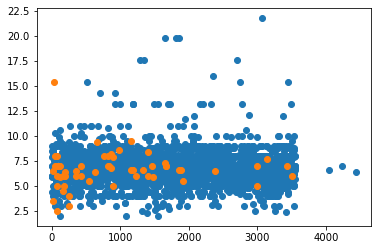

In [431]:
sigma_indexes=sigma3(df05[col])
no_outliers=df05.bweight.drop(sigma_indexes)
plt.scatter( no_outliers.index,no_outliers.values)
plt.scatter( df05.bweight[sigma_indexes].index,df05.bweight[sigma_indexes].values)

## Reescalado de datos

## RESUMEN DATOS PIPELINE

# 3. Procesamiento de datos

## 3.1. Implementación de la *pipeline*

## 3.2. *Honest Causal Forest*